In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\ev\EV-Vehicle-Analysis-\Electric_Vehicle_Population_Data.csv")

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [10]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [11]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [12]:
df.drop(columns=['Legislative District'], inplace=True)

In [13]:
df.dropna(subset=['County', 'City', 'Postal Code',
                  'Vehicle Location', 'Electric Utility',
                  '2020 Census Tract'],
          inplace=True)

In [14]:
df.isna().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       36
Base MSRP                                            36
DOL Vehicle ID                                        0
Vehicle Location                                      0
Electric Utility                                      0
2020 Census Tract                                     0
dtype: int64

In [21]:
for col in ['Electric Range', 'Base MSRP']:
    median_val = df[col].median()  # Find the middle value
    df[col] = df[col].fillna(median_val)

In [22]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# EDA
Understand the dataset and explore the relationships between

In [23]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,DOL Vehicle ID,2020 Census Tract
count,235682.000000,235682.000000,235682.000000,235682.000000,2.356820e+05,2.356820e+05
mean,98177.642909,2021.406688,46.256239,786.954901,2.353133e+08,5.298066e+10
std,2524.254921,2.991910,84.042210,7176.459057,6.799190e+07,1.521088e+09
min,1731.000000,2000.000000,0.000000,0.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,2.053464e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,2.522804e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,2.696405e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,4.792548e+08,5.602100e+10


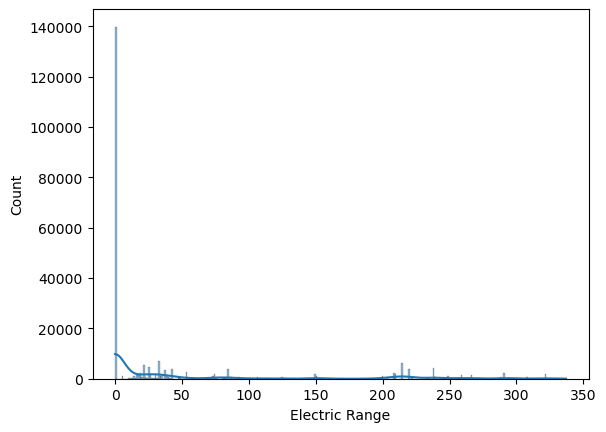

In [24]:
sns.histplot(df['Electric Range'], kde=True)  # Histogram with KDE for distribution
plt.show()

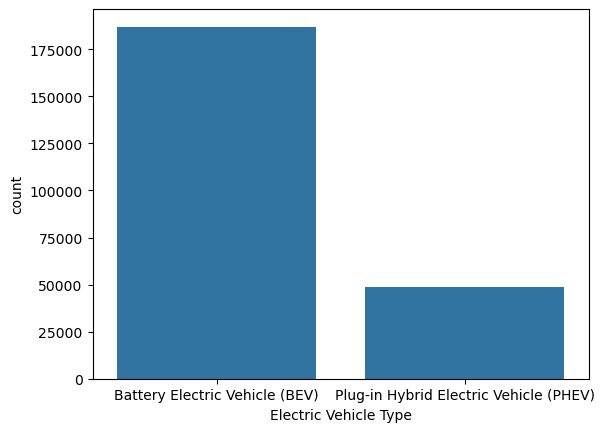

In [25]:
sns.countplot(x='Electric Vehicle Type', data=df)
plt.show()

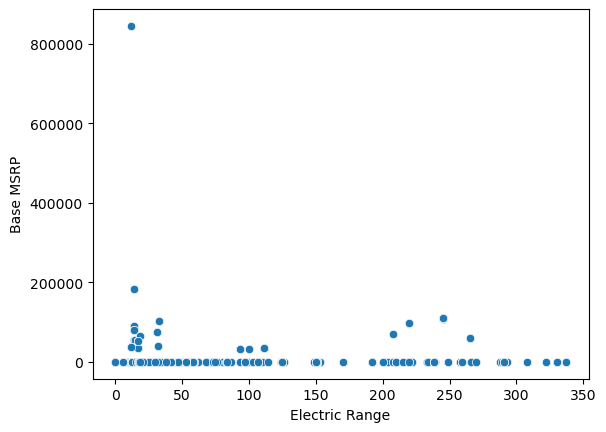

In [26]:
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.show()

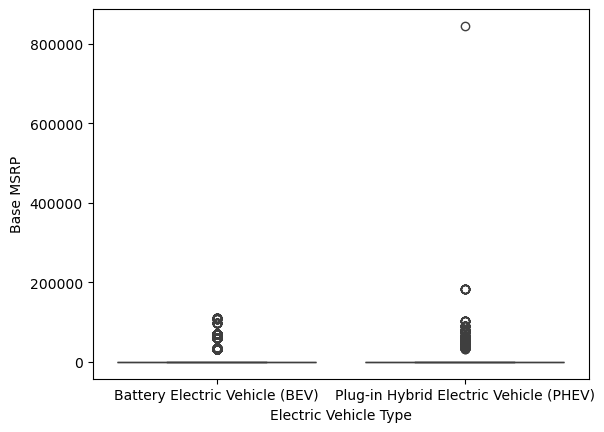

In [27]:
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.show()

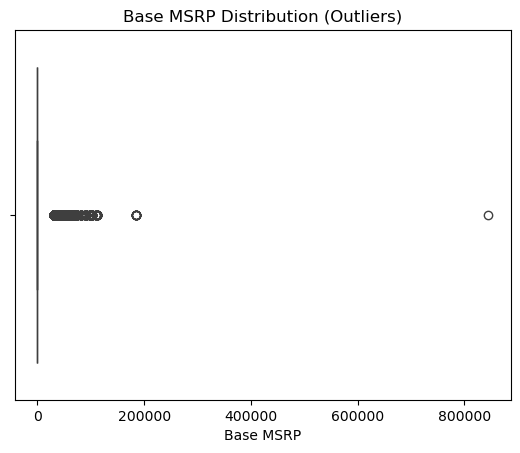

In [28]:
sns.boxplot(data=df, x='Base MSRP')
plt.title("Base MSRP Distribution (Outliers)")
plt.show()

In [29]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            186992
Plug-in Hybrid Electric Vehicle (PHEV)     48690
Name: count, dtype: int64

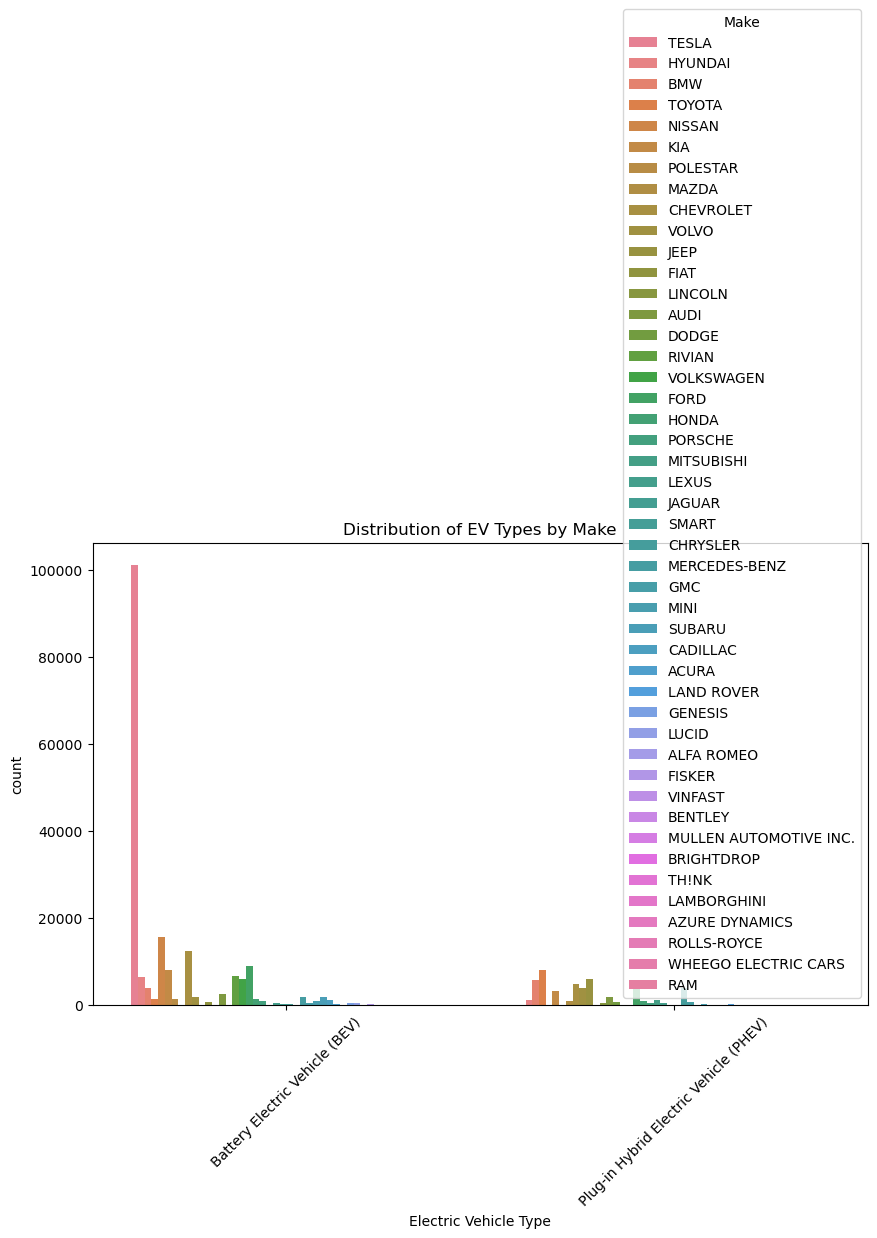

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type', hue='Make')
plt.xticks(rotation=45)
plt.title('Distribution of EV Types by Make')
plt.show()

# Predictive Model (Split the data)

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop('Base MSRP', axis=1)
y = df['Base MSRP']

x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state=42)

Select a Model for Predictive analysis

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: '1G1FX6S09P'

In [41]:
df.drop(columns=['VIN (1-10)'], inplace=True)  # Drop non-numeric 

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: could not convert string to float: '1G1FX6S09P'